Clase 1 laboratorio
Modelado Continuo

In [109]:
import numpy as np
import matplotlib.pyplot as plt   

Problema 1: Como hago para resolver
$$y' = \lambda y$$
Tomo iteraciones, usando h chiquitos, pensando que como conozco la derivada puedo ir avanzando h veces la derivada desde el punto x y tengo la funcion en ul punto x+h

In [110]:
n = 1000
y = [1 for i in range(0,n,1)]
h = 0.01
lamb = 1
for i in range(0,n-1,1):
    y[i+1] = y[i]+h*lamb*y[i]

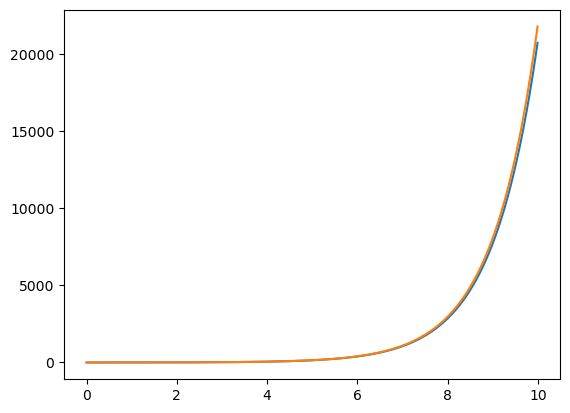

In [111]:
x = np.arange(n)*h
y = np.array(y)
z = [np.exp(i) for i in x]
plt.plot(x, y)
plt.plot(x,z)
plt.show()

Problema 2: 
Resolver $$y''(t)+\gamma.y'(t)+\frac k m \cdot y(t)=A\cdot sen(3t)$$
Muy dificil asi nomas, asi que resuelvo el sistema: $$v'(t)+\gamma.v(t)+\frac k m \cdot y(t)=A\cdot sen(3t)$$
$$y' = v$$
Entonces tomo iteraciones de la onda Euler, como:
$$v[i+1] = v[i] + h\cdot (-\gamma.v[i]-\frac k m \cdot y[t]+A\cdot sen(3t[i]))$$
$$y[i+1] = y[i] + h\cdot v[i]

In [119]:
n = 1000
y = [0 for i in range(0,n,1)]
v = [1 for i in range(0,n,1)]

gamma = 10
k = 0.1
m = 10
A = 3

h = 4/n
x = np.arange(1,5,h)

In [120]:
for i in range(n-1):
    v[i+1] = v[i] + h*(-gamma*v[i]-k/m*y[i]+A*np.sin(3*x[i]))
    y[i+1] = y[i] + h*v[i]

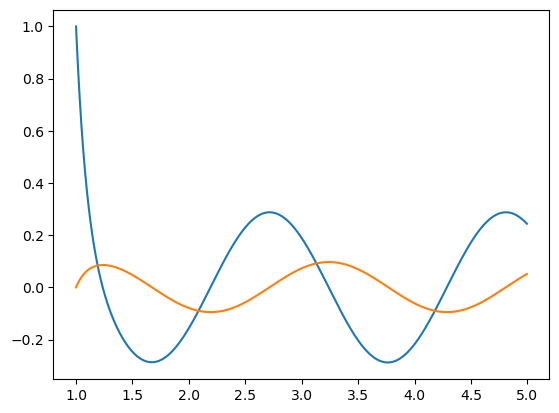

In [121]:
plt.plot(x,v)
plt.plot(x,y)

Metodo de Heun, la idea es usar Runge Kutta pero con A1=A2=1/2 y a=1

In [122]:
def Heun(a,b,N,F,y0):
    h = (b-a)/N
    t = np.linspace(a,b,N+1)
    y = np.zeros((2, N+1))
    y[:,0] = y0

    for k in range(1,N+1):
        K1 = F(t[k-1], y[:,k-1])
        K2 = F(t[k-1] + 2/3*h, y[:,k-1] + 2/3*h*K1)
        print(K2)
        y[:, k] = y[:,k-1] + h*(1/4*K1 + 3/4*K2)

    return(t,y)

In [116]:
def F(t, y):
    return np.array([y[1], A*np.sin(3*t)-gamma*y[1]-(k/m)*y[0]])

In [117]:
t, y = Heun(1,5,1000,F,[0,1])

[ 0.97446229 -9.34506269]
[ 0.93775822 -9.01376738]
[ 0.90235273 -8.69550872]
[ 0.8681947  -8.38977067]
[ 0.83523508 -8.09605743]
[ 0.80342674 -7.81389261]
[ 0.77272442 -7.5428185 ]
[ 0.74308466 -7.2823953 ]
[ 0.7144657  -7.03220047]
[ 0.68682747 -6.79182802]
[ 0.66013148 -6.56088789]
[ 0.63434075 -6.33900526]
[ 0.6094198  -6.12582006]
[ 0.58533454 -5.92098628]
[ 0.56205225 -5.72417152]
[ 0.53954149 -5.53505637]
[ 0.5177721  -5.35333396]
[ 0.49671511 -5.17870945]
[ 0.4763427  -5.01089957]
[ 0.45662817 -4.84963214]
[ 0.43754589 -4.69464566]
[ 0.41907124 -4.54568889]
[ 0.4011806  -4.40252044]
[ 0.38385128 -4.26490838]
[ 0.36706153 -4.13262991]
[ 0.35079043 -4.00547092]
[ 0.33501794 -3.88322576]
[ 0.31972479 -3.76569681]
[ 0.30489252 -3.65269421]
[ 0.29050338 -3.54403558]
[ 0.27654037 -3.43954567]
[ 0.26298715 -3.33905613]
[ 0.24982804 -3.24240522]
[ 0.23704801 -3.14943754]
[ 0.22463264 -3.06000383]
[ 0.21256807 -2.97396066]
[ 0.20084104 -2.89117025]
[ 0.18943879 -2.81150024]
[ 0.1783491 

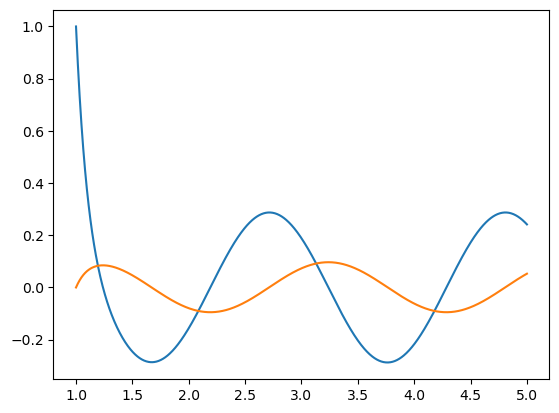

In [118]:
plt.plot(t, y[1])
plt.plot(t, y[0])